In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [111]:
df = pd.read_csv("CA.csv")

OP_array = df["Inflation Adjusted Price"].values
OP = OP_array.reshape(-1,1)
#print(OP_array)
#print(OP.shape)

In [112]:
result = []
for i in range(len(OP_array) - 2):
    result.append([OP_array[i], OP_array[i+1], OP_array[i+2]])
OP_newx = np.array(result)
#print(OP_newx)
OP_newy = OP_array[3:].reshape(-1,1)

OP_newx_train = OP_newx[:-6]
OP_newy_train = OP_newy[:-5]
#OP_newx_test = OP_newx[-6:-1]
OP_newx_test = OP_newx[-6:]
OP_newy_test = OP_newy[-5:]

#print(OP_newx_test)
#print(OP_newy_test)
#print(OP_newx_test.shape)
#print(OP_newy_test.shape)
#print(OP_newx_train.shape[0])

37.3460346636
[ 42.53        34.13        37.34603466]
[ 39.61071364]
[ 34.13        37.34603466  39.61071364]
[ 41.4644197]


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:40: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


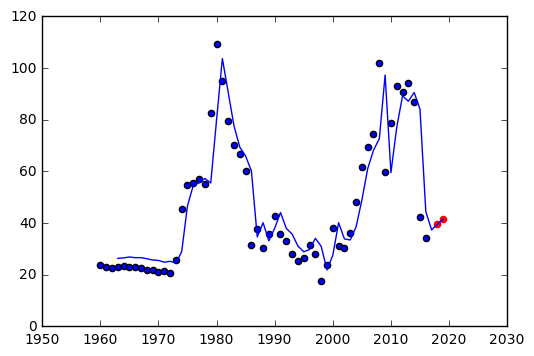

In [113]:
#Lasso regression
regr = linear_model.Lasso()
regr.fit(OP_newx_train, OP_newy_train)

OP_lassoy_train = regr.predict(OP_newx_train)
OP_lassoy_test = regr.predict(OP_newx_test)

#print(OP_newy_train.reshape(1,-1))
#print(OP_lassoy_train.shape)
#print(OP_newy_test.reshape(1,-1))
#print(OP_lassoy_test.shape)

#print(np.array(df["Inflation Adjusted Price"][-5:]))

#year_new = df.Year[-5:].values
year_all = np.append(df.Year.values, [2017, 2018, 2019])
y_lasso = np.append(OP_lassoy_train, OP_lassoy_test)

OP_17_y = y_lasso[-1]
print(OP_17_y)
OP_18_x = np.append(OP_array[-2:], OP_17_y)
print(OP_18_x)
OP_18_y = regr.predict(OP_18_x)
print(OP_18_y)

OP_18 = OP_18_y.item(0)
OP_19_x = np.append(OP_18_x[-2:], OP_18)
print(OP_19_x)
OP_19_y = regr.predict(OP_19_x)
print(OP_19_y)
OP_19 = OP_19_y.item(0)

y_lasso_all = np.append(y_lasso, [OP_18, OP_19])

#print(year_all.shape[0])
#print(y_lasso.shape[0])
#print(df.Year[3:].reshape(-1,1).shape)

plt.figure()
plt.scatter(df.Year.reshape(-1,1), df["Inflation Adjusted Price"])
#plt.plot(df.Year[2:-1].reshape(-1,1), y_lasso[:-1])
plt.scatter(year_all[-2:].reshape(-1,1), y_lasso_all[-2:], color='red')
plt.plot(year_all[3:].reshape(-1,1), y_lasso_all)
plt.show()

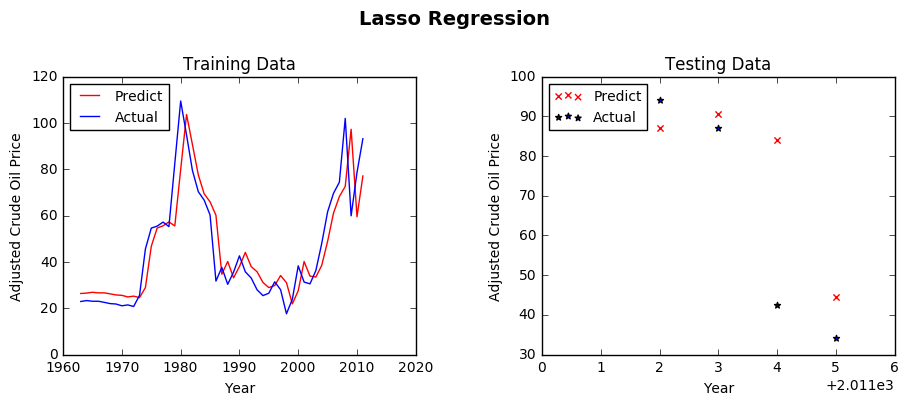

In [114]:
fig = plt.figure(figsize=(10,4.5))
fig.suptitle('Lasso Regression', fontsize=14, fontweight='bold')

#Plot for training data
fig.add_subplot(121)
plt.plot(df.Year[3:-5],regr.predict(OP_newx_train),label='Predict',c='r')
plt.plot(df.Year[3:-5],OP_newy_train,label='Actual')
plt.legend(loc=0,fontsize=10)
plt.title('Training Data')
plt.xlabel('Year')
plt.ylabel('Adjusted Crude Oil Price')
         
#Plot for testing data
fig.add_subplot(122)
plt.scatter(df.Year[-5:],regr.predict(OP_newx_test)[:-1],marker='x',c='r',label='Predict')
plt.scatter(df.Year[-5:],OP_newy_test, marker='*',label='Actual')
plt.legend(loc=2,fontsize=10)
plt.title('Testing Data')
plt.xlabel('Year')
plt.ylabel('Adjusted Crude Oil Price')

plt.tight_layout(pad=4, w_pad=4)
plt.show()